In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/wb_lifexpec.csv')

In [3]:
d.describe()

,year,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1989.000000,69.231356,68.219203,77.627492,44.396797,70.376542,78.008475,56.439949
std,17.175564,3.200572,9.096243,3.804051,9.294390,6.965974,2.532839,5.831832
min,1960.000000,64.168000,45.191000,71.707000,29.026000,57.059000,73.100000,44.846000
25%,1974.500000,66.989000,64.948000,74.208500,36.470500,64.476500,76.250000,52.934500
50%,1989.000000,68.714000,70.819000,77.498000,46.039000,73.160000,78.500000,58.364000
75%,2003.500000,70.956500,74.386000,80.900000,51.433500,75.175000,79.900000,60.980500
max,2018.000000,75.336000,79.051000,84.100000,59.649000,80.704000,81.300000,63.746000


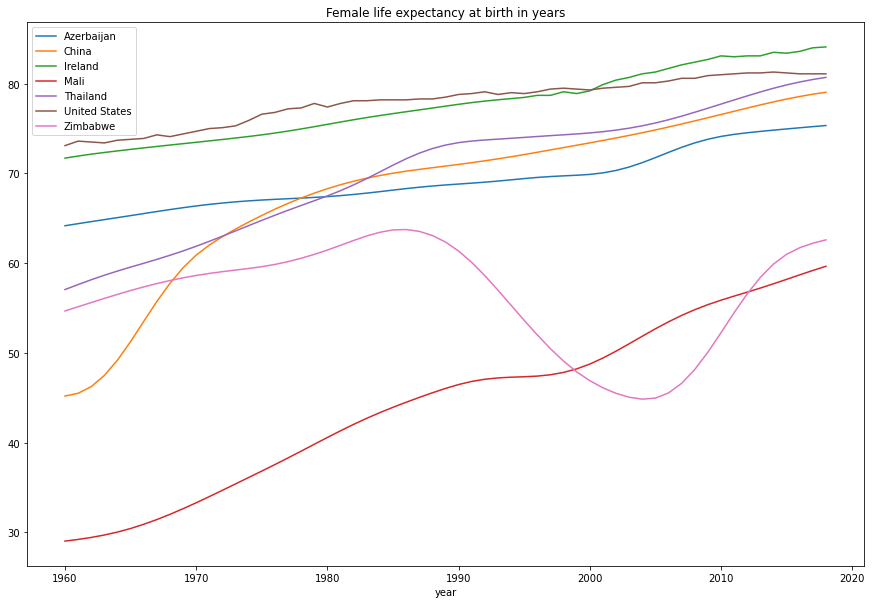

In [4]:
d.plot(x = 'year', kind='line', figsize = (15, 10), title = 'Female life expectancy at birth in years')

plt.savefig('images/wb_lifexpec.jpeg')

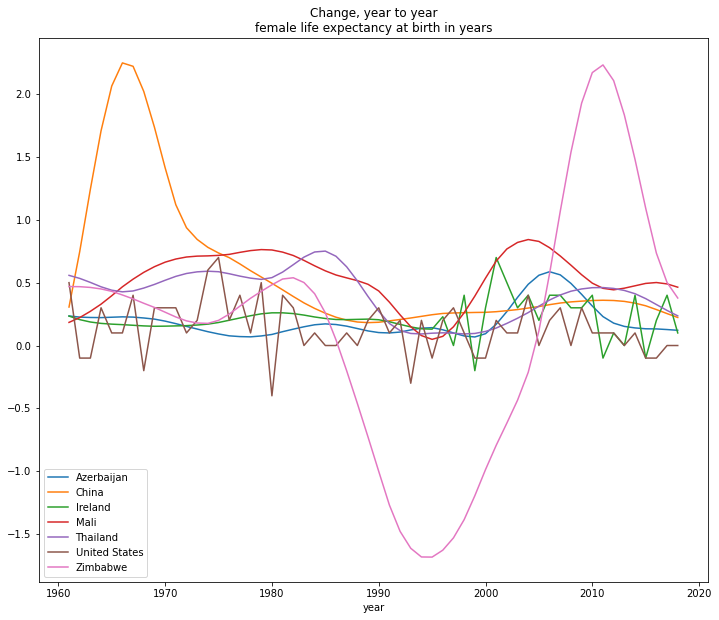

In [5]:
# instead of 
# d.loc[:, d.columns != 'year']
# could do 
# d.drop(columns = 'year')

d.loc[:, d.columns != 'year'].diff().join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Change, year to year\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_chg.jpeg')

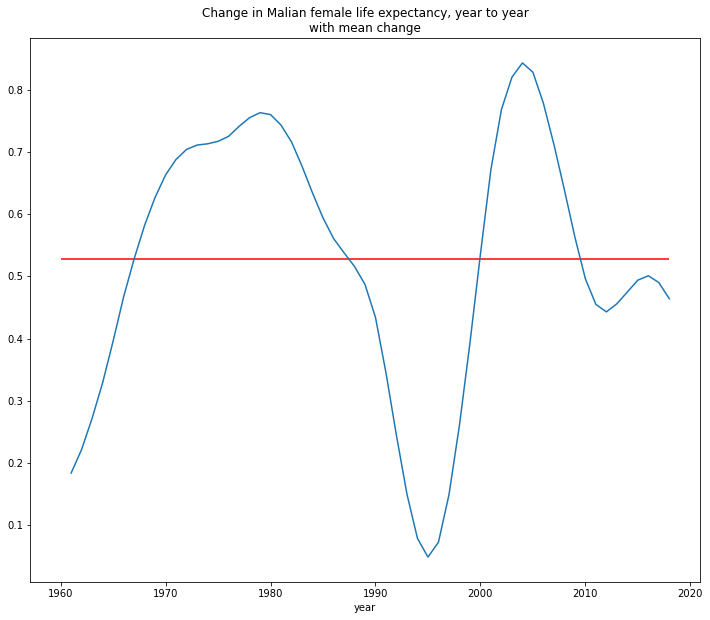

In [6]:
# easier not to do d.Mali here
# for later joining back with year and nicer plotting
# d[['Mali']] returns a data frame, whereas d.Mali, d.loc[:, 'Mali'] return pandas series

mali = d[['Mali']].diff()

mali.join(d.year).plot(
    x = 'year', kind = 'line', figsize = (12, 10), title = 'Change in Malian female life expectancy, year to year\nwith mean change',
    legend = False
).hlines(y = mali.mean(), xmin = d.year.min(), xmax = d.year.max(), color = 'red')


plt.savefig('images/wb_lifexpec_chgmali.jpeg')

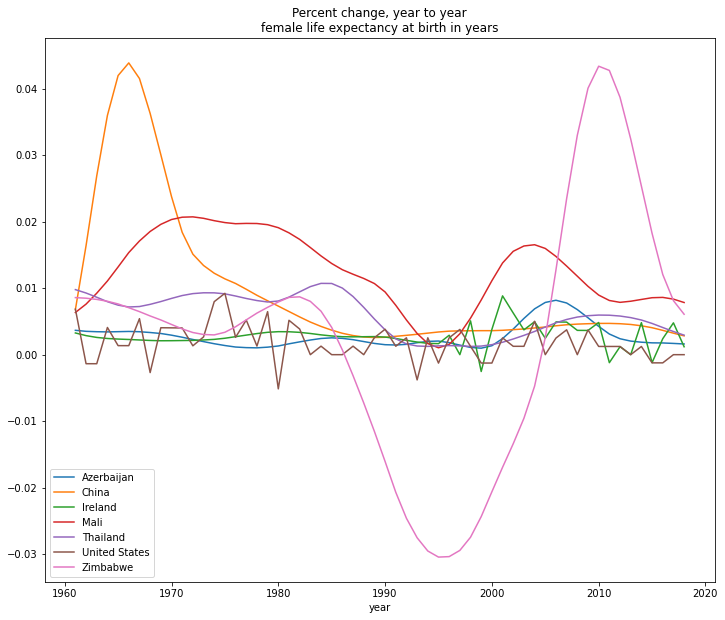

In [7]:
d.drop(columns = 'year').pct_change().join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Percent change, year to year\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_chg_pct.jpeg')

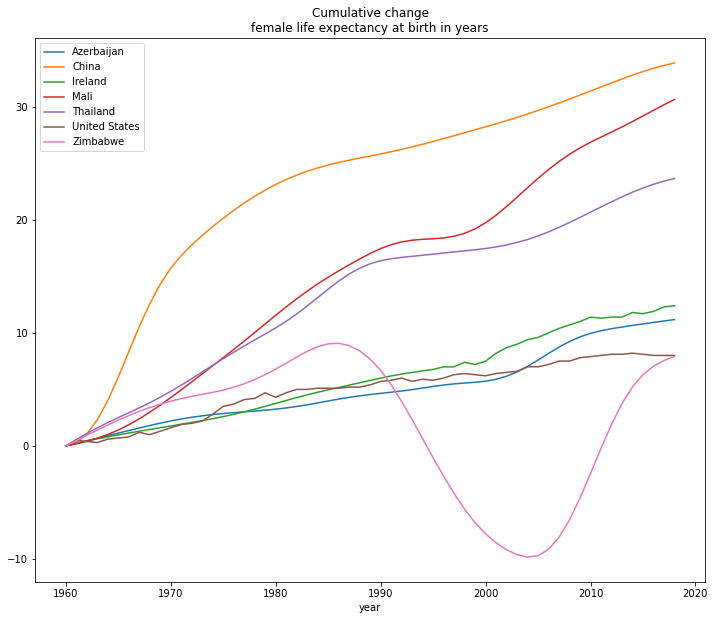

In [8]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

ddiff = d.drop(columns = 'year') - d.drop(columns = 'year').loc[0]
ddiff.join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Cumulative change\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_cumulative.jpeg')

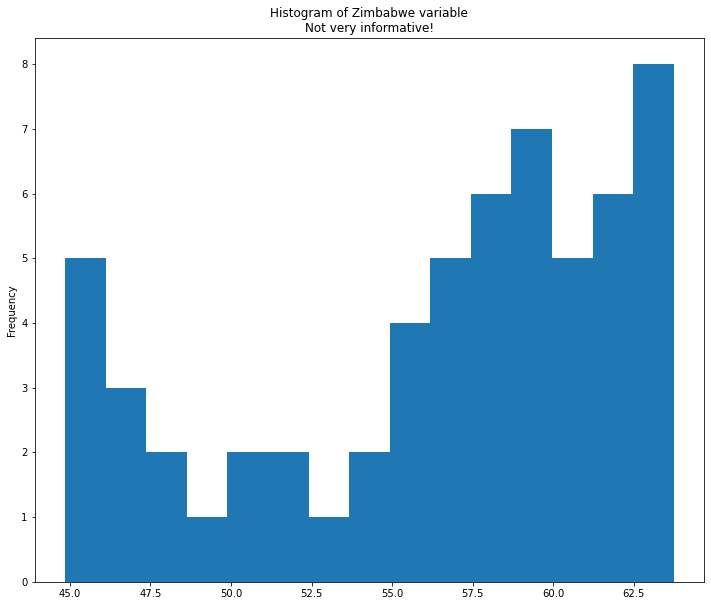

In [9]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

d.Zimbabwe.plot(kind = 'hist', bins = 15, figsize = (12, 10), title = 'Histogram of Zimbabwe variable\nNot very informative!')

plt.savefig('images/wb_lifexpec_histzimb.jpeg')

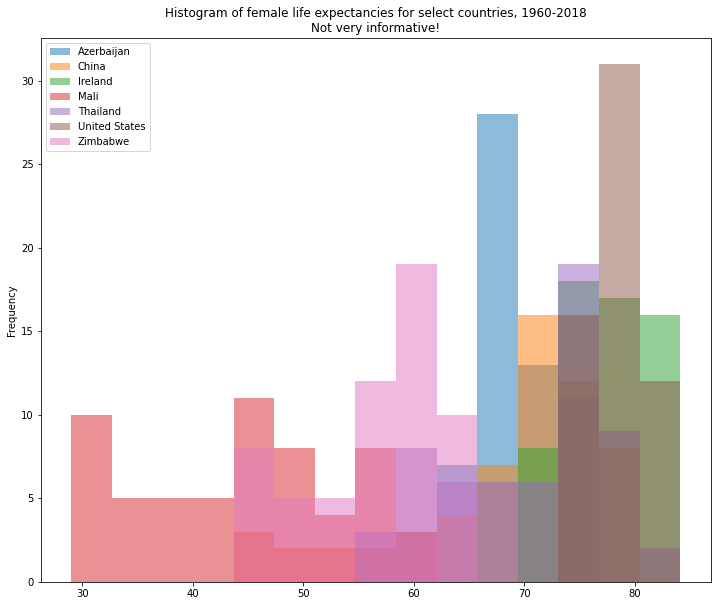

In [10]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

d.drop(columns = 'year').plot(kind = 'hist', bins = 15, alpha = .5, figsize = (12, 10), title = 'Histogram of female life expectancies for select countries, 1960-2018\nNot very informative!')

plt.savefig('images/wb_lifexpec_histogram.jpeg')

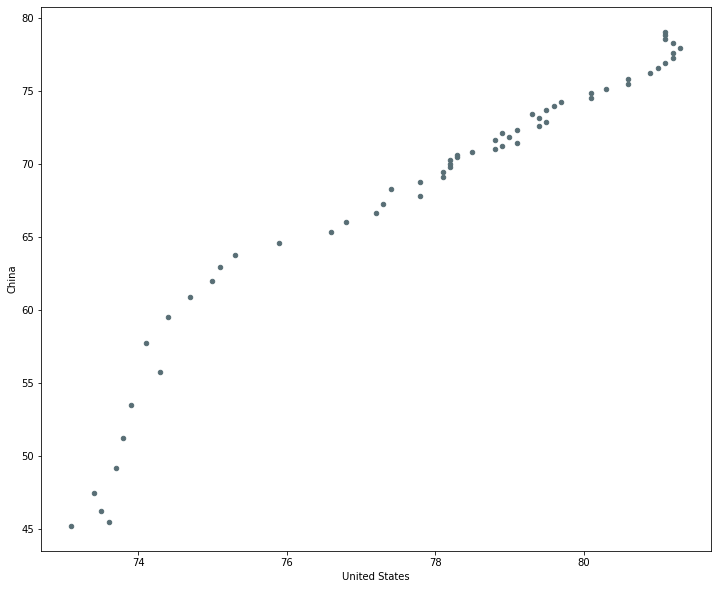

In [11]:
d.plot(x = 'United States', y = 'China', kind = 'scatter', figsize = (12, 10), color = '#586e75')
plt.savefig('images/wb_lifexpec_scatter_one.jpeg')

In [12]:
# or do it with seaborn, which has many great tools for visualizing statistics and distributions
# writing as a little function so I can experiment

def country_pairs(co, vsco1, vsco2, figsize = (12, 10), align = False):
    plt.subplots(figsize = figsize)
    ax = plt.subplot(121)
    sns.scatterplot(data = d, x = co, y = vsco1, color = '#586e75').set_title(f'{co} v {vsco1} female life expectancy\nPay attention to the axes!')
    if align:
        plt.subplot(122, sharey = ax)
    else:
        plt.subplot(122)
    sns.scatterplot(data = d, x = co, y = vsco2, color = '#859900').set_title(f'{co} v {vsco2} female life expectancy\nPay attention to the axes!')

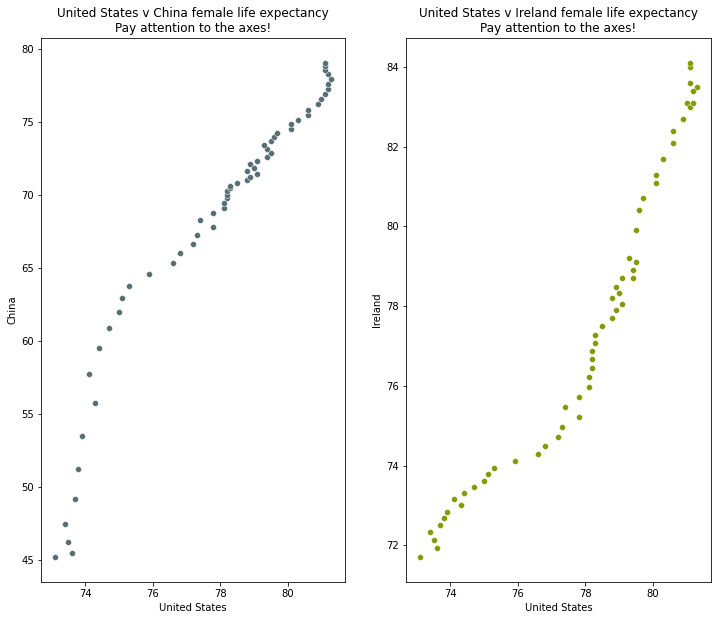

In [13]:
# y axes don't match!
country_pairs('United States', 'China', 'Ireland')
plt.savefig('images/wb_lifexpec_scatter.jpeg')

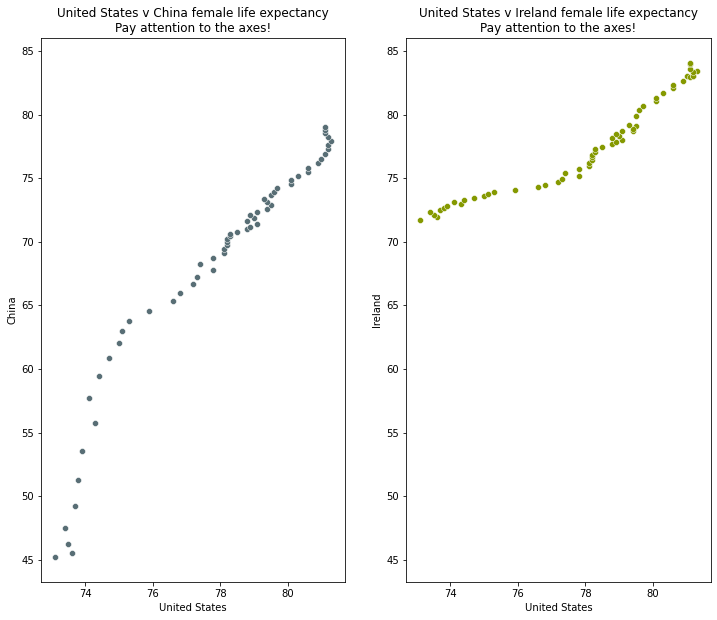

In [14]:
country_pairs('United States', 'China', 'Ireland', align = True)
plt.savefig('images/wb_lifexpec_scatter_align.jpeg')

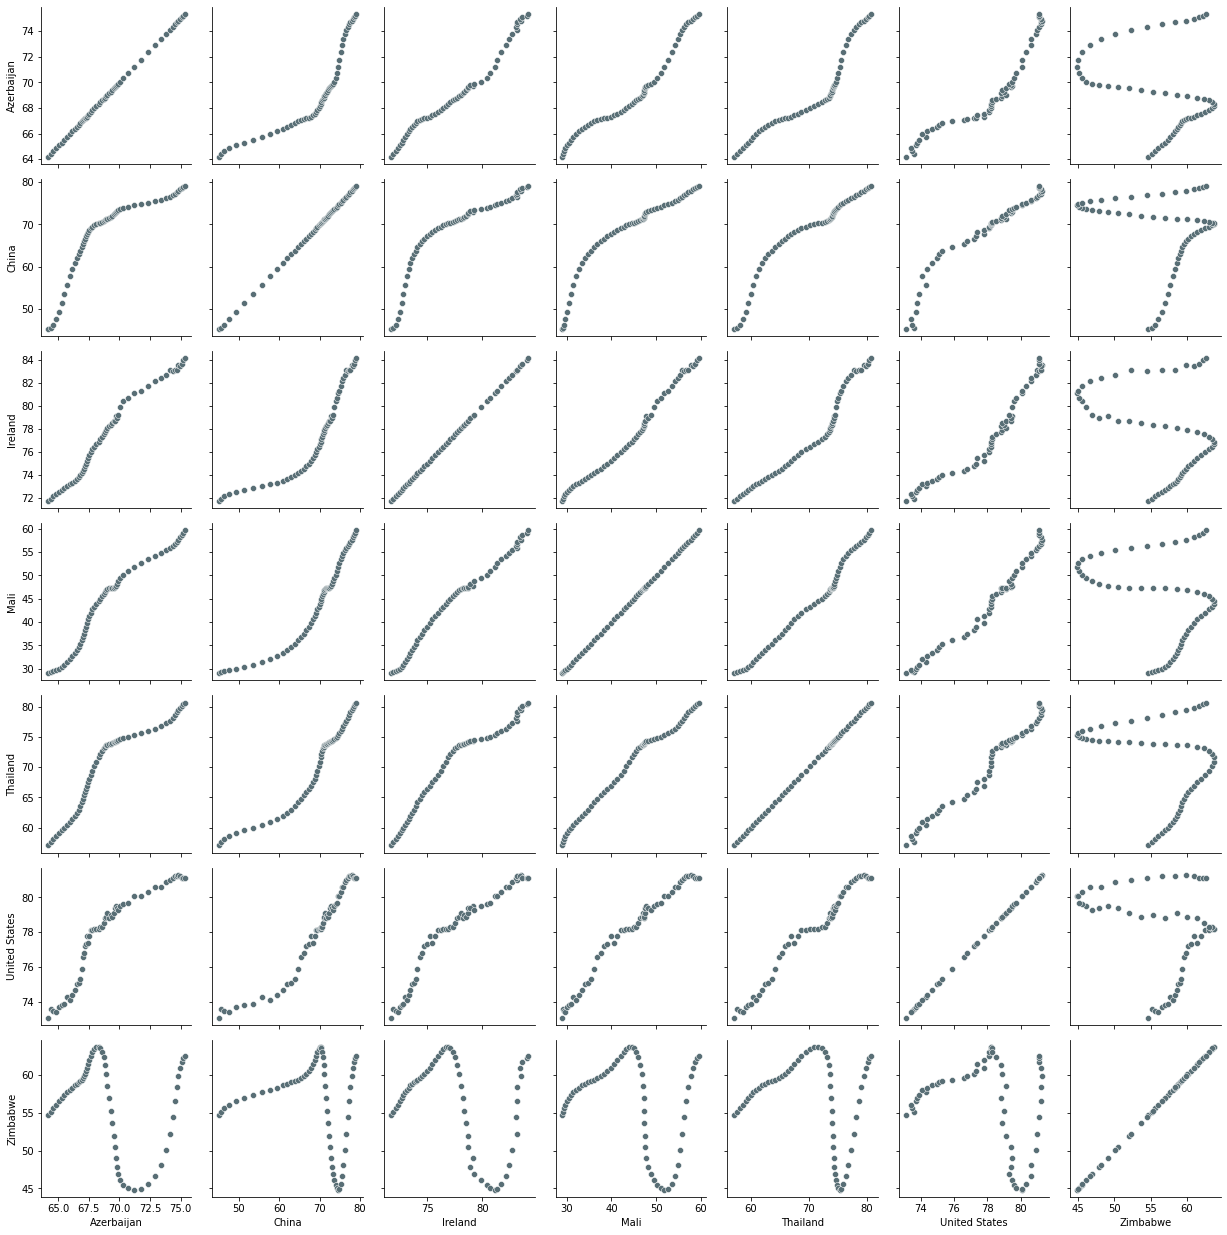

In [15]:
# do them all with seaborn

sns.PairGrid(d.drop(columns = 'year')).map(sns.scatterplot, color = '#586e75')
plt.savefig('images/wb_lifexpec_scatter_all.jpeg')

In [16]:
d.head()

,year,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
0,1960,64.168,45.191,71.707,29.026,57.059,73.1,54.672
1,1961,64.403,45.497,71.941,29.210,57.617,73.6,55.141
2,1962,64.629,46.243,72.147,29.432,58.151,73.5,55.609
3,1963,64.852,47.486,72.334,29.704,58.653,73.4,56.071
4,1964,65.074,49.194,72.510,30.033,59.120,73.7,56.521


In [17]:
nlast = d.shape[0] - 1
d.apply(lambda x: x[nlast] - x[0])

year             58.000
Azerbaijan       11.168
China            33.860
Ireland          12.393
Mali             30.623
Thailand         23.645
United States     8.000
Zimbabwe          7.926
dtype: float64

In [18]:
pd.DataFrame([d.apply(lambda x: x[nlast] - x[0]), d.apply(lambda x: (x[nlast] - x[0])/x[0])], 
             index = ['change_yr', 'change_pct']).drop(columns = 'year')

,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
change_yr,11.168000,33.860000,12.393000,30.62300,23.645000,8.000000,7.926000
change_pct,0.174043,0.749264,0.172828,1.05502,0.414396,0.109439,0.144974


In [19]:
# or do this slightly more concisely with
d.drop(columns = 'year').apply(lambda x: [x[nlast] - x[0], (x[nlast] - x[0])/x[0]], result_type = 'expand')

,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
0,11.168000,33.860000,12.393000,30.62300,23.645000,8.000000,7.926000
1,0.174043,0.749264,0.172828,1.05502,0.414396,0.109439,0.144974


In [20]:
# Covariance plots function

def plot_multnorm(n, rs = np.linspace(-1, 1, 9)):
    gen = np.random.default_rng()
    
    # draw multinormal, convert to dataframe with r constant column
    def draw_mvn(r):
        df = pd.DataFrame(gen.multivariate_normal(mean = np.zeros(2), cov = np.array([[1, r], [r, 1]]), size = n).tolist(),
                         columns = ['x', 'y'])
        df['r'] = r
        return df
    
    return pd.concat([draw_mvn(r) for r in rs], ignore_index = True)

In [21]:
# small example
plot_multnorm(3, rs = [-1, 0, 1])

,x,y,r
0,-0.431901,0.431901,-1
1,0.447328,-0.447328,-1
2,-0.355710,0.355710,-1
3,1.830328,0.011087,0
4,0.059115,2.725469,0
5,0.482272,0.207763,0
6,-0.584741,-0.584741,1
7,0.377057,0.377057,1
8,-0.364135,-0.364135,1


In [22]:
# for real
# rounding those correlations
d = plot_multnorm(100).assign(r = lambda x: x.r.round(2))

In [23]:
d.r.value_counts()

 1.00    100
 0.75    100
 0.50    100
 0.25    100
 0.00    100
-0.25    100
-0.50    100
-0.75    100
-1.00    100
Name: r, dtype: int64

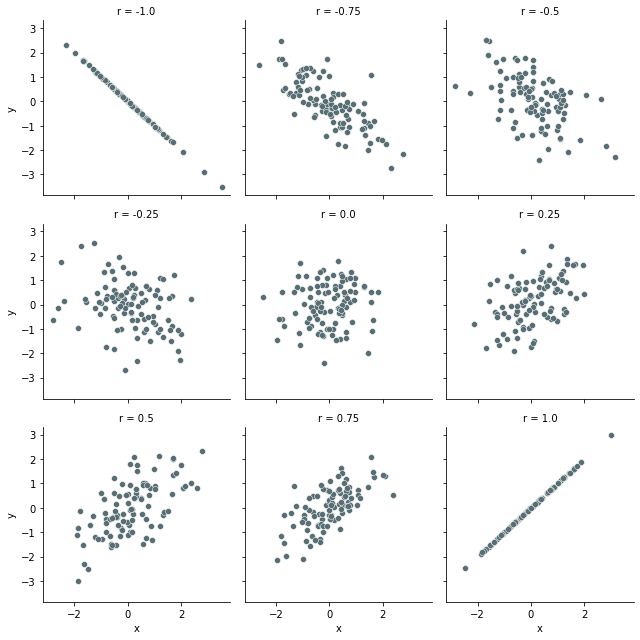

In [24]:
sns.FacetGrid(d, col = 'r', col_wrap = 3).map(sns.scatterplot, 'x', 'y', color = '#586e75')
plt.savefig('images/mvn_corrplot.jpeg')

In [25]:
def sinuwave(n, k = 4, amp = 4, slopes = [0, 3]):
    x = np.linspace(-k*np.pi, k*np.pi, n)
    df = pd.concat([pd.DataFrame({'x': x, 'y': amp*np.sin(x) + x*s, 'slope': s}) for s in slopes])
    
    return df

In [26]:
d = sinuwave(100)

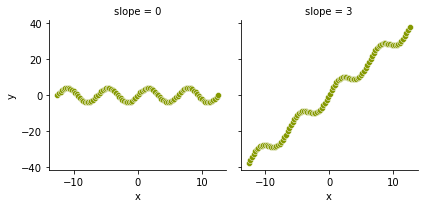

In [27]:
sns.FacetGrid(d, col = 'slope').map(sns.scatterplot, 'x', 'y', color = '#859900')
plt.savefig('images/mvn_sinplot.jpeg')

In [28]:
d.groupby('slope').corr()

x         y
slope                      
0     x  1.000000 -0.190985
      y -0.190985  1.000000
3     x  1.000000  0.991807
      y  0.991807  1.000000